### Topic:  Churn Prediction for Telco Customer

#### Objective:

The objective of this project is to develop a machine learning model that can predict customer churn for a telecommunications company using the provided dataset. Churn is a one of the biggest problem in the telecom industry. Research has shown that the average monthly churn rate among the top 4 wireless carriers in the US is 1.9% - 2%. The model will be trained on customer data, including demographics, services, account information, and churn status, to create a targeted customer retention program that will help the company reduce customer attrition. To achieve this objective, the following steps will be taken:

    1. Data exploration: The provided dataset will be analyzed to understand the structure and characteristics of the data.
    2. Data preprocessing: The data will be cleaned, transformed, and preprocessed to make it suitable for analysis and modeling.
    3. Feature engineering: Appropriate features will be extracted from the data to capture the relevant information needed for the churn prediction model.
    4. Model selection: A machine learning task and dataset will be selected from the provided list, and an appropriate model will be chosen based on the problem requirements and the characteristics of the data.
    5. Model training: The selected model will be trained on the preprocessed data using appropriate machine learning algorithms and techniques.
    6. Model evaluation: The trained model will be evaluated using appropriate metrics to measure its performance and generalization ability.
    
The ultimate goal of this project is to create a reliable and accurate churn prediction model that can help the telecommunications company develop targeted customer retention programs and reduce customer attrition.

In [1]:
import pandas as pd
import sklearn

In [2]:
import os 
# obtain working directory
working_directory = os.getcwd() 

#append the file name with working directory. 
path = working_directory + '/TelcoCustomerChurnPrediction/Telco-Customer-Churn.csv'

#read the file and stored it ChurnDS_frm_CSV dataframe.
ChurnDS_frm_CSV = pd.read_csv(path)

print(working_directory)

/Users/arunraj/Documents/MS Data Science/Machine Learning/Project/MLClassifiers


#### Data Exploration and Analysis:

In [3]:
ChurnDS_frm_CSV.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService   
0  7590-VHVEG  Female              0     Yes         No       1           No  \
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection   
0  No phone service             DSL             No  ...               No  \
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling   
0          No          No              No  Month-to-month              Yes  \
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges Churn  
0           Electronic check          29.85         29.85    No  
1               Mailed check          56.95        1889.5    No  
2               Mailed check          53.85        108.15   Yes  
3  Bank transfer (automatic)          42.30       1840.75    No  
4           Electronic check          70.70        151.65   Yes  

[5 rows x 21 columns]

In [4]:
# number of rows and columns in the dataset
ChurnDS_frm_CSV.shape

(7043, 21)

In [5]:
#To list data type and column names
ChurnDS_frm_CSV.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
# Checking for missing values
ChurnDS_frm_CSV.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

SeniorCitizen       tenure  MonthlyCharges  TotalCharges
count    7043.000000  7043.000000     7043.000000   7032.000000
mean        0.162147    32.371149       64.761692   2283.300441
std         0.368612    24.559481       30.090047   2266.771362
min         0.000000     0.000000       18.250000     18.800000
25%         0.000000     9.000000       35.500000    401.450000
50%         0.000000    29.000000       70.350000   1397.475000
75%         0.000000    55.000000       89.850000   3794.737500
max         1.000000    72.000000      118.750000   8684.800000

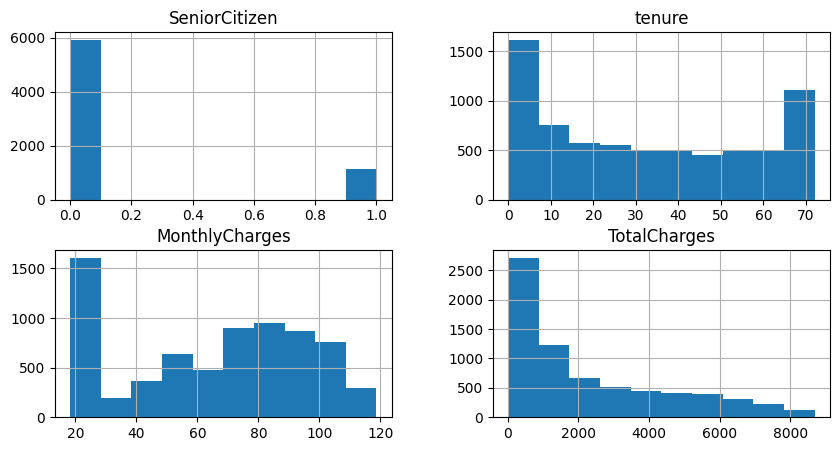

In [7]:
ChurnDS_frm_CSV['TotalCharges'] = pd.to_numeric(ChurnDS_frm_CSV['TotalCharges'], errors='coerce')
ChurnDS_frm_CSV.hist(figsize=(10,5))
ChurnDS_frm_CSV.describe()

In [8]:

#check for unique values for categorisation.
ChurnDS_frm_CSV.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6530
Churn                  2
dtype: int64

###### Data Exploration:

Our initial step is to delve into the data set and conduct data exploration. By analyzing the distribution of individual variables, we can gain a deeper understanding of the underlying patterns within the data, which may lead to the formation of insightful hypotheses. In addition, we will employ slicing and dicing techniques to uncover any noteworthy trends that may be present within the data.

Plot the group in pie chart to understand the data grouping according to Unique categories. 

###### Demographics 
    Let us first understand the gender, age range, patner and dependent status of the customers

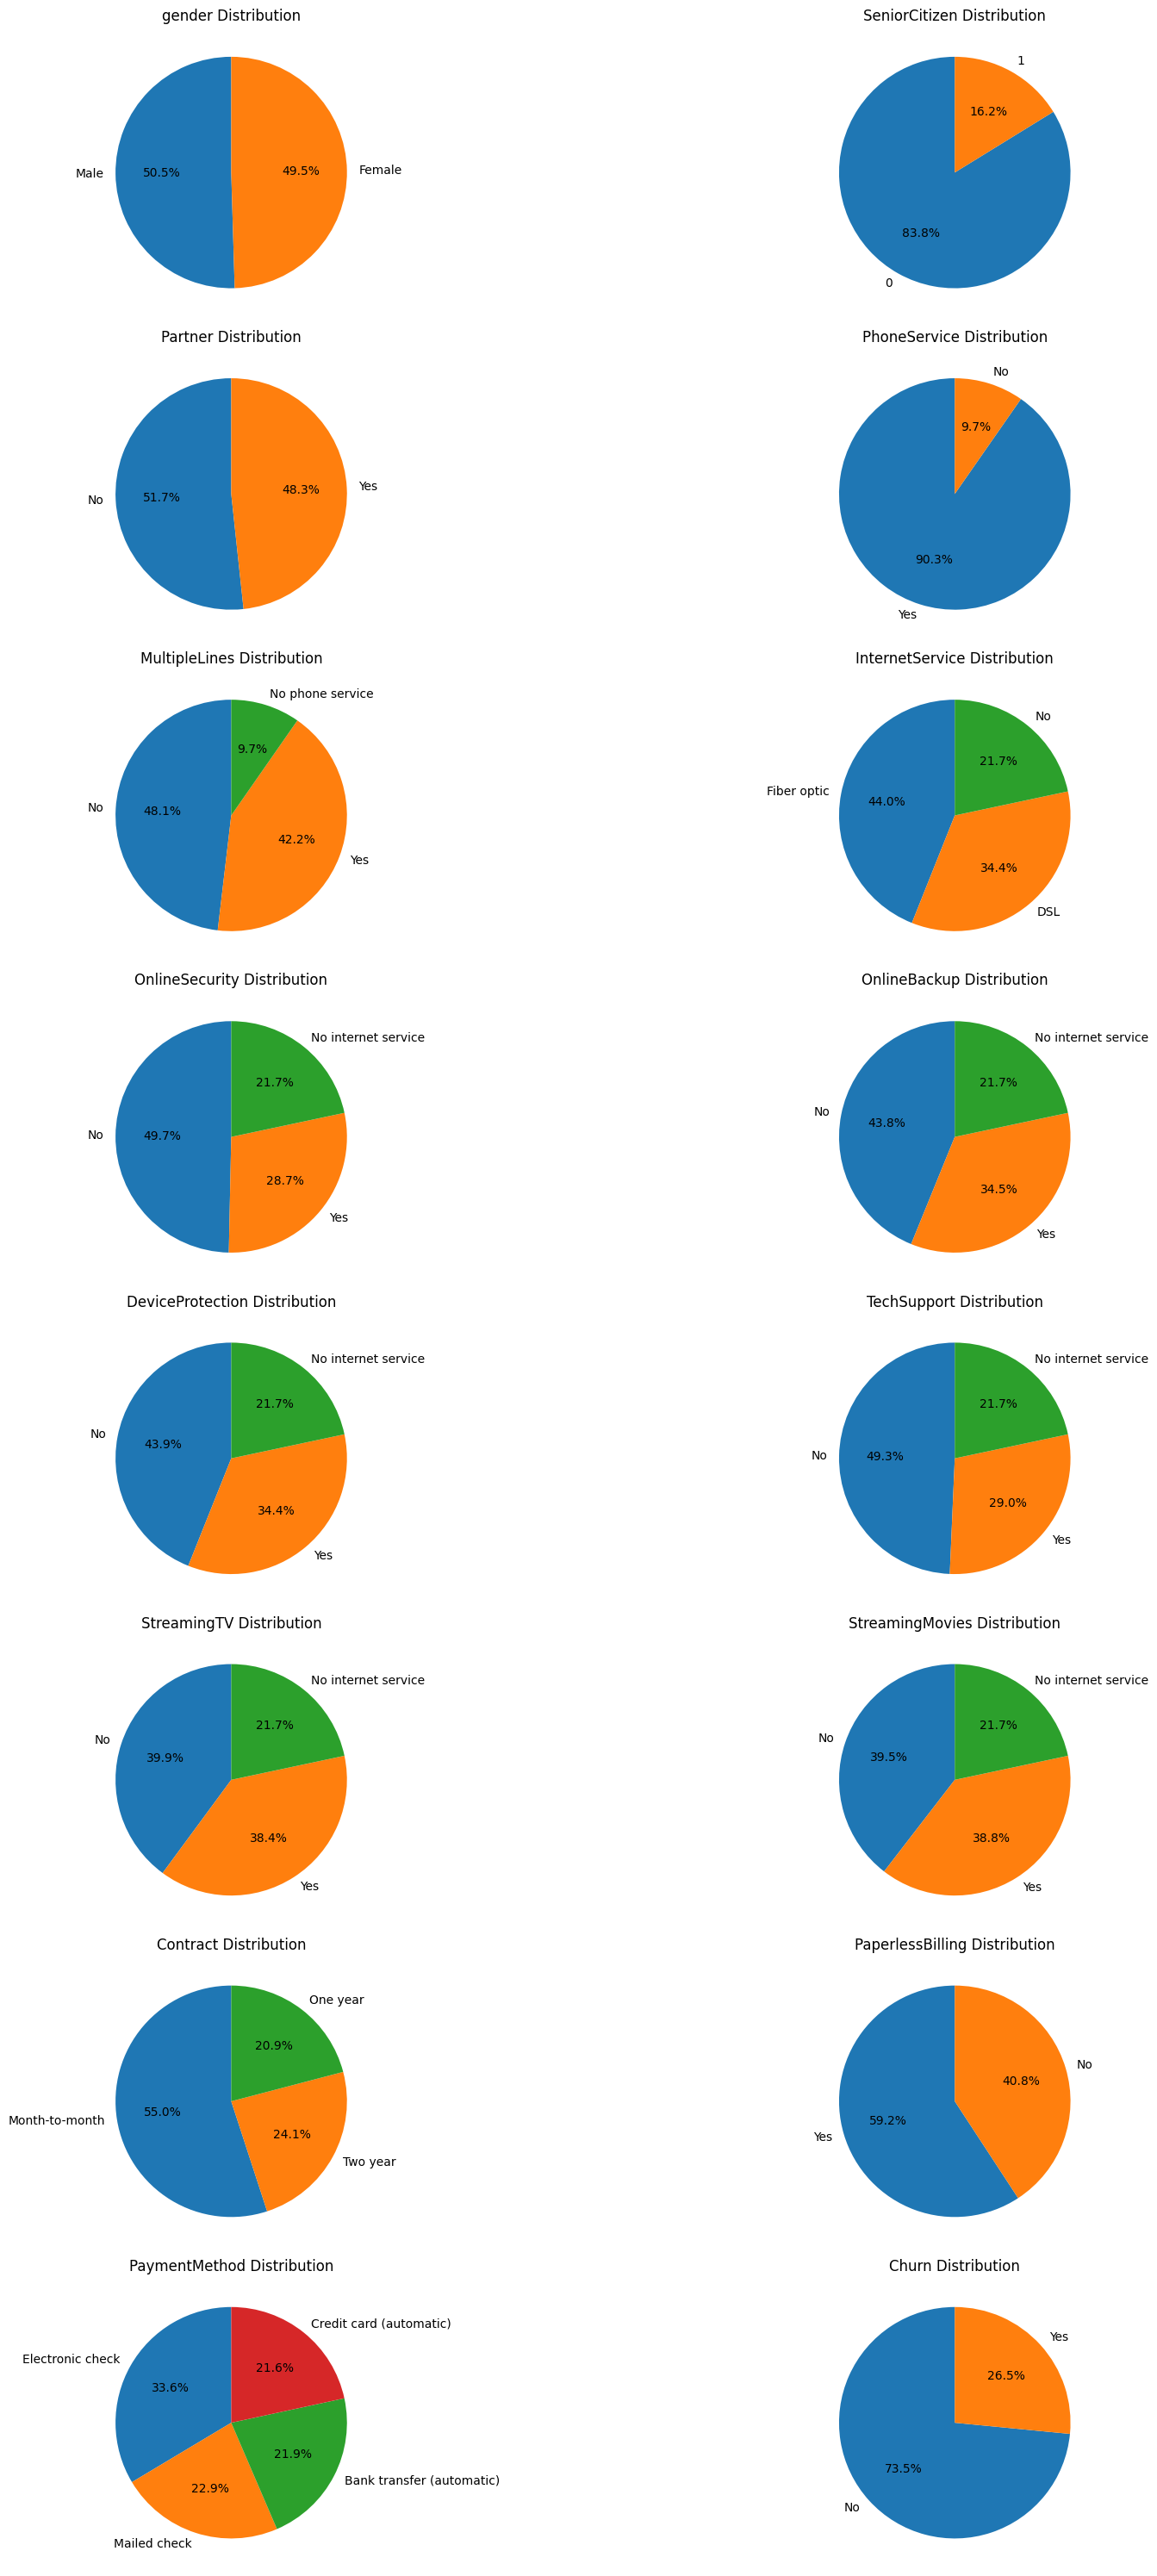

In [9]:
#

import matplotlib.pyplot as plt
fig = plt.figure(figsize=(20, 30), facecolor='white')

categorical_columns = ['gender', 'SeniorCitizen', 'Partner','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod','Churn']
unique_categories_dataframes = {}

ncols = 2
nrows = (len(categorical_columns) + ncols - 1) // ncols

# create the subplots
axes = fig.subplots(nrows=nrows, ncols=ncols)

for idx, column in enumerate(categorical_columns):
    row, col = idx // ncols, idx % ncols
    value_counts = ChurnDS_frm_CSV[column].value_counts(normalize=True)
    labels = value_counts.index
    sizes = value_counts.values

    axes[row, col].pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
    axes[row, col].set_title(f'{column} Distribution')

# If there are any empty subplots, remove them
if nrows * ncols > len(categorical_columns):
    for idx in range(len(categorical_columns), nrows * ncols):
        row, col = idx // ncols, idx % ncols
        fig.delaxes(axes[row, col])

plt.tight_layout()
plt.show()

Observation from above Pie chart is,

    Gender Distribution: About half of the customers in our data set are male while the other half are female
    % Senior Citizens: There are only 16% of the customers who are senior citizens. Thus most of our customers in the data are younger people.
    Partner and dependent status: About 48% of the customers have a partner, while only 30% of the total customers have dependents.
    
###### Create Bar chart on Churn values for each Categorical Variable using Bar chart. 

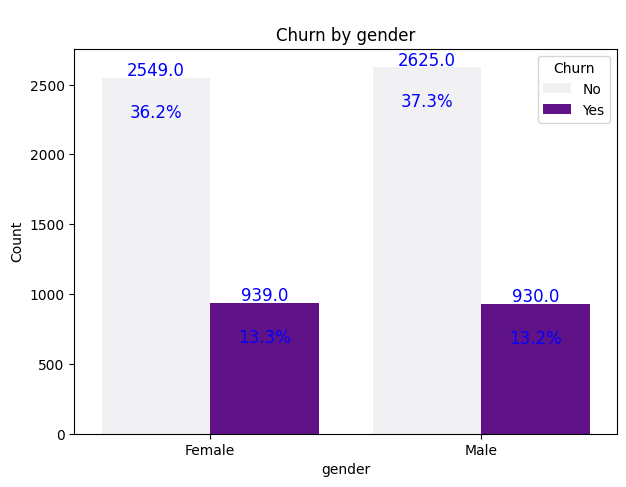

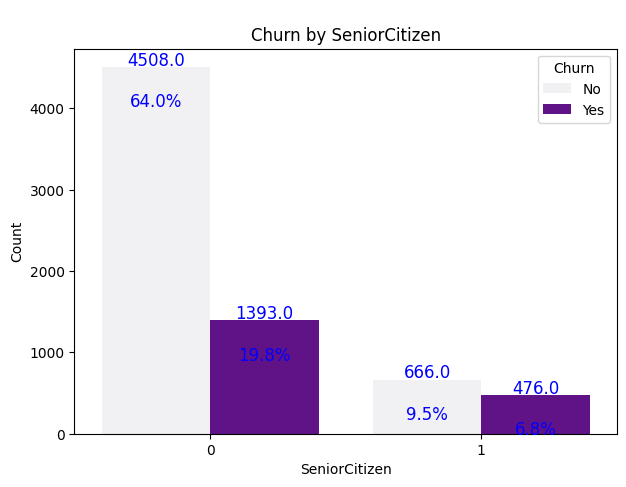

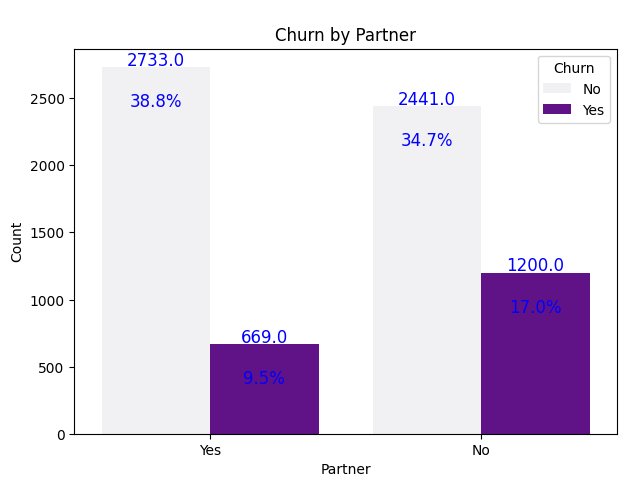

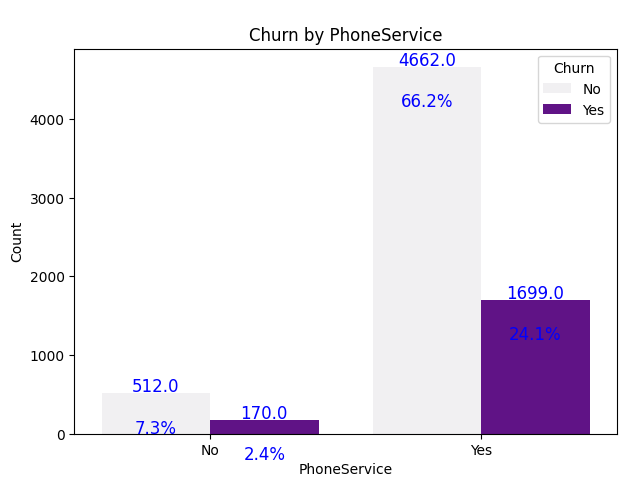

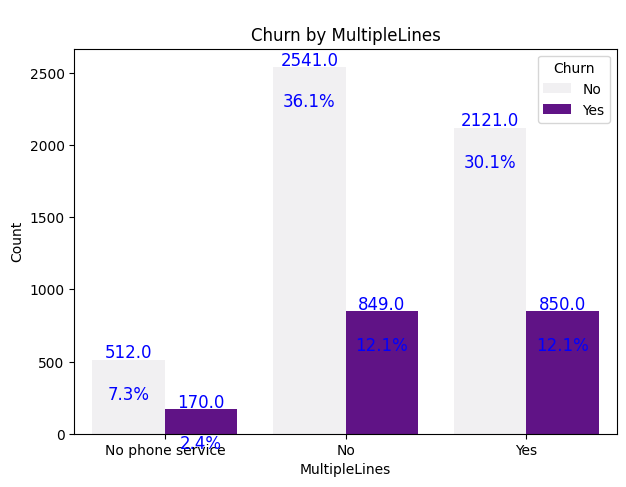

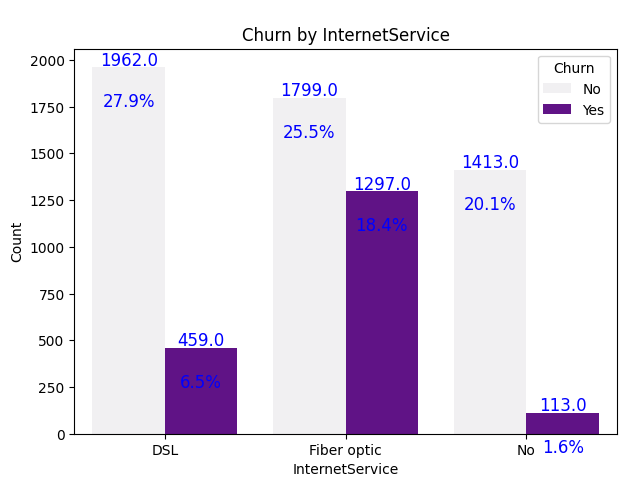

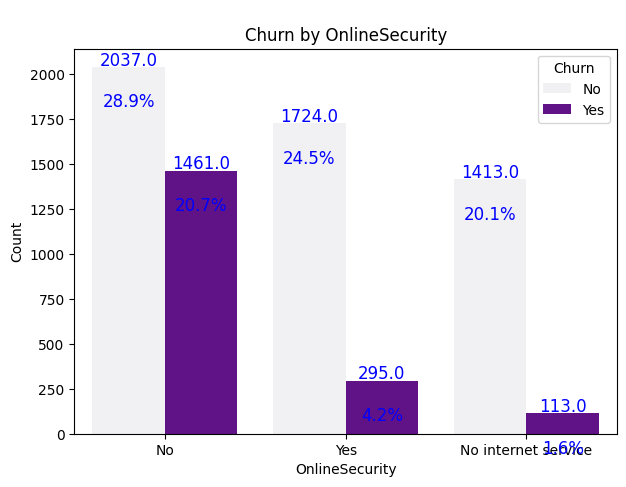

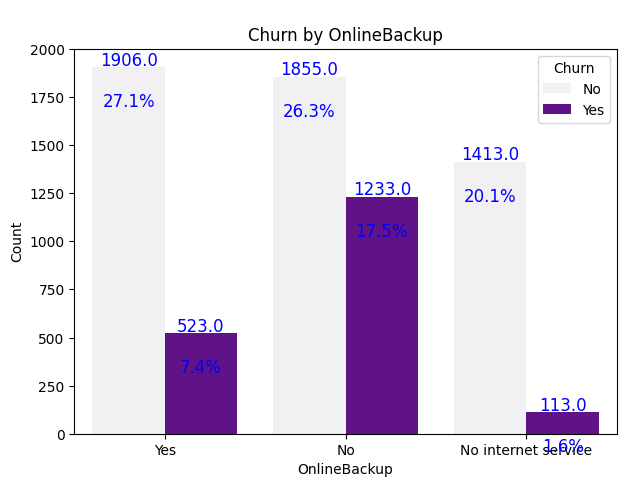

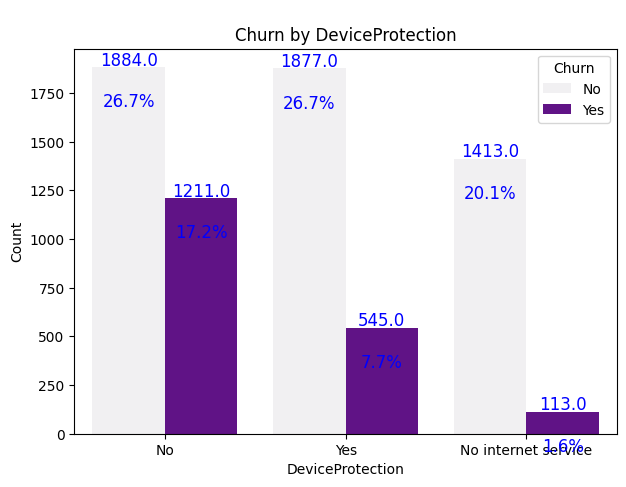

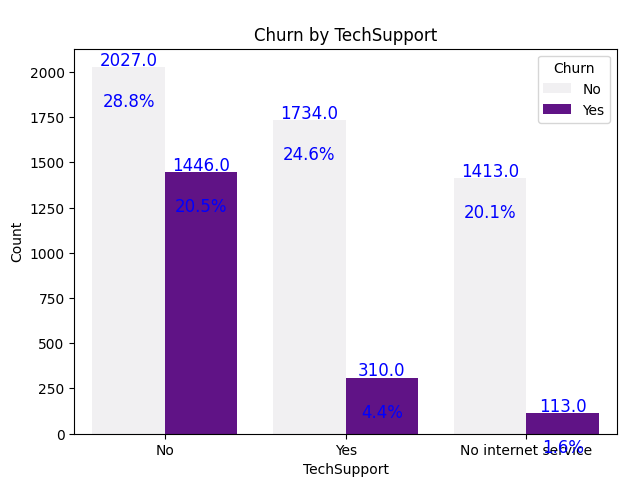

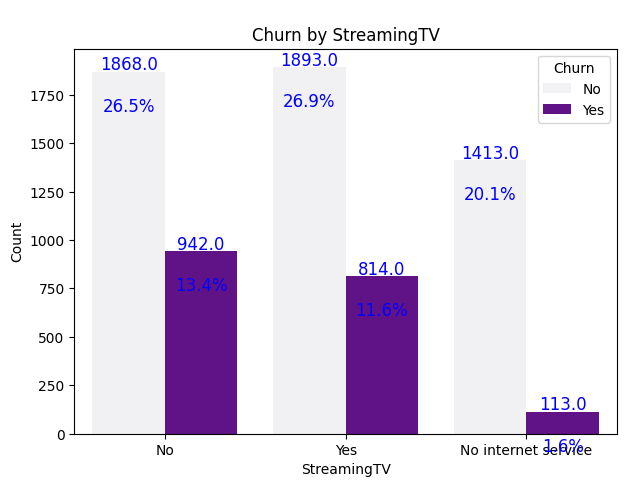

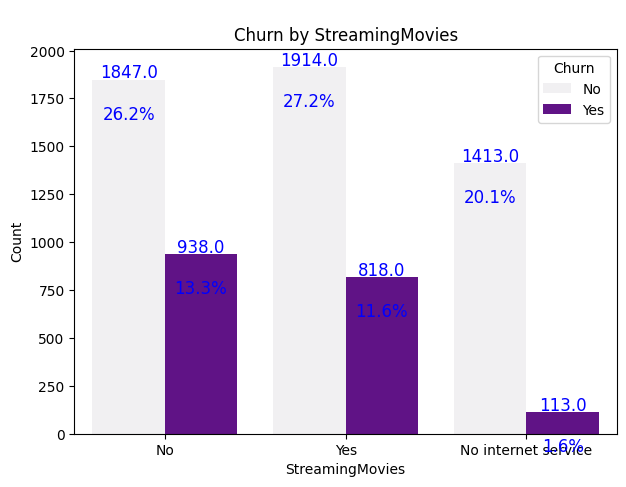

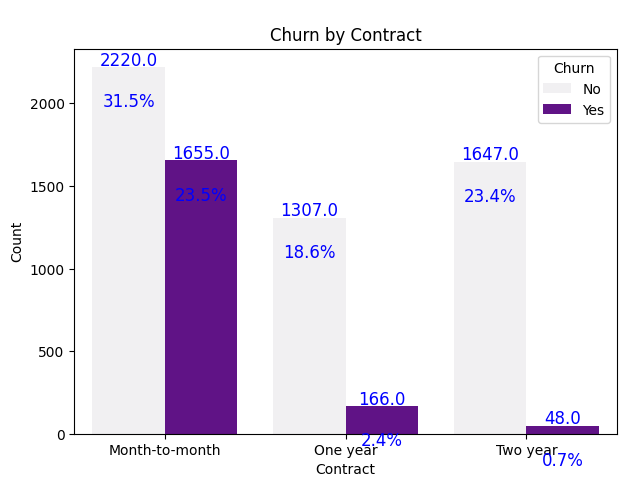

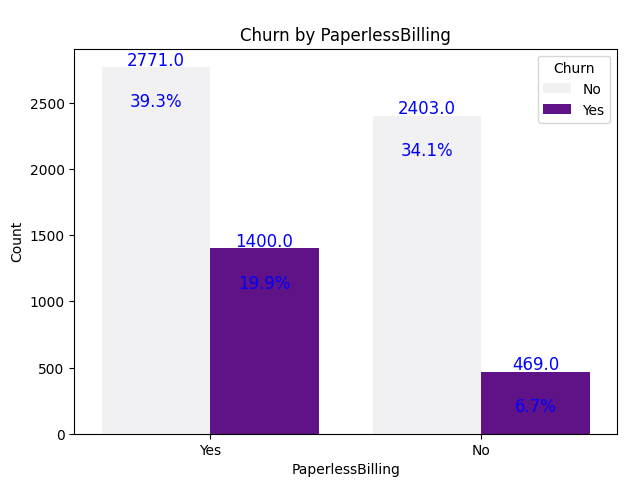

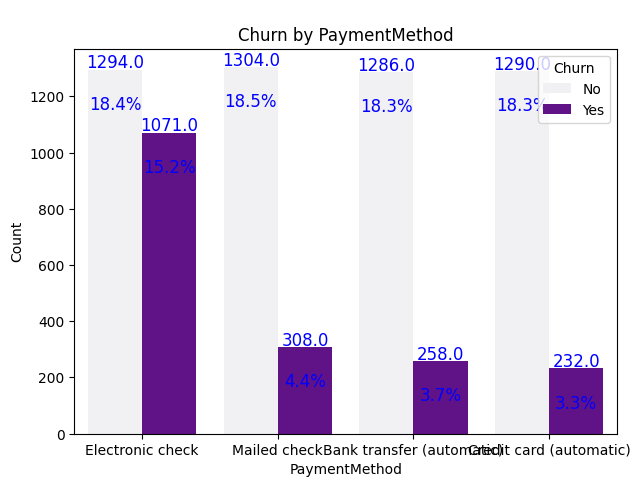

In [10]:
import seaborn as sns # For creating plots
def plot_categorical_churn_relationship(column_name, data):
    plt.figure(figsize=(7, 5))
    ax = sns.countplot(x=column_name, hue='Churn', data=data, color = (.4, 0, .6, 0.7))
    plt.title(f"Churn by {column_name}")
    plt.xlabel(column_name)
    plt.ylabel('Count')

    # Add count and percentage values to the bars
    total_count = len(data[column_name])
    for p in ax.patches:
       
        count = p.get_height()
        percentage = '{:.1f}%'.format(100 * count / total_count)
        ax.annotate(f'\n\n{count}\n\n{percentage}', 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='center', 
                    fontsize=12,
                    color='blue',
                    xytext=(0, 5), 
                    textcoords='offset points')
                    
        """
        percentage = '{:.1f}%'.format(100 * p.get_height() / len(data))
        ax.annotate(percentage, (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='center', fontsize=12, color='white', 
                    xytext=(0, 10), textcoords='offset points')
        """
        
    plt.show()

for column in categorical_columns[:-1]:  # Exclude 'Churn value' from the list
    plot_categorical_churn_relationship(column, ChurnDS_frm_CSV)

Partner: Interestingly, among the customers who have a partner, only about half of them also have a dependent, while other half do not have any independents. Additionally, as expected, among the customers who do not have any partner, a majority (80%) of them do not have any dependents .

Tenure: After looking at the Contract histogram we can see that a lot of customers have been with the telecom company for just month-to-month, while quite a many are there for about 24 months. 1 - 2 year contract having lower churn rate. This could be potentially because different customers have different contracts. Thus based on the contract they are into it could be more/less easier for the customers to stay/leave the telecom company.

Below we will understand the tenure of customers based on their contract type.

Text(0.5, 1.0, 'Two Year Contract')

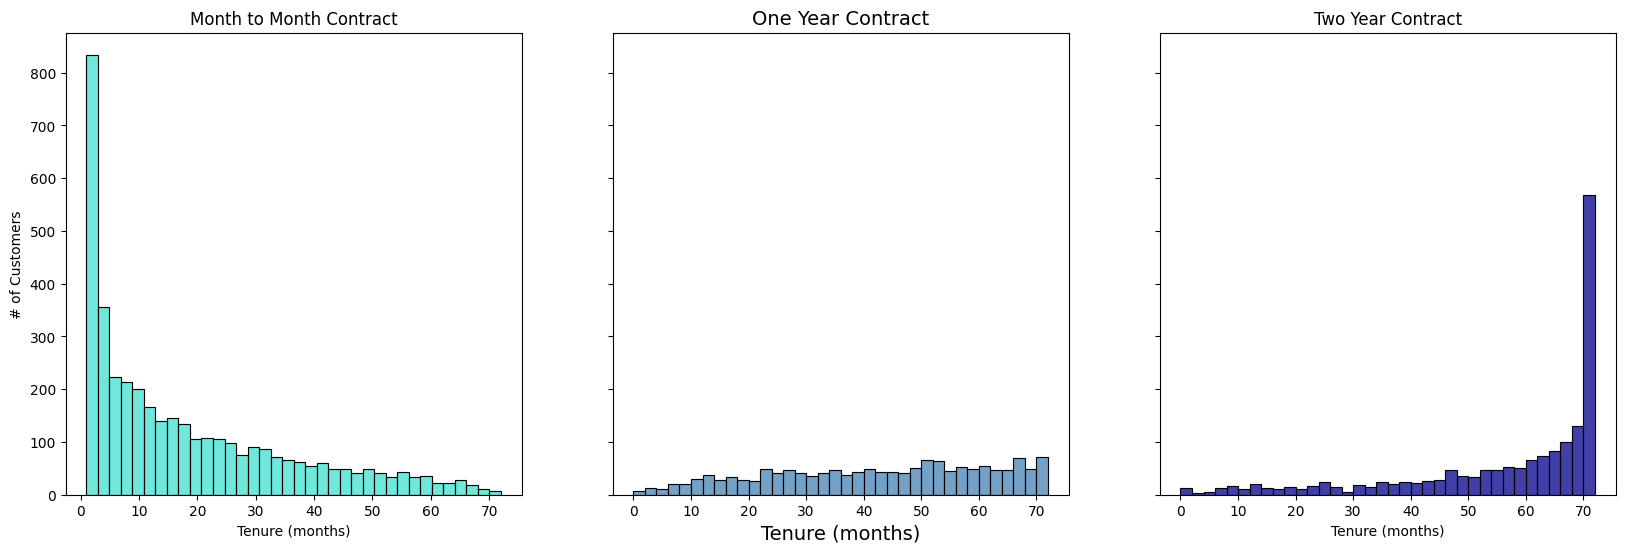

In [11]:
fig, (ax1,ax2,ax3) = plt.subplots(nrows=1, ncols=3, sharey = True, figsize = (20,6))

sns.histplot(data=ChurnDS_frm_CSV[ChurnDS_frm_CSV['Contract']=='Month-to-month'], x='tenure', 
             bins=int(180/5), color='turquoise', edgecolor='black',
             ax=ax1)
ax1.set_ylabel('# of Customers')
ax1.set_xlabel('Tenure (months)')
ax1.set_title('Month to Month Contract')

sns.histplot(data=ChurnDS_frm_CSV[ChurnDS_frm_CSV['Contract']=='One year'], x='tenure', 
             bins=int(180/5), color='steelblue', edgecolor='black',
             ax=ax2)
ax2.set_xlabel('Tenure (months)',size = 14)
ax2.set_title('One Year Contract',size = 14)

sns.histplot(data=ChurnDS_frm_CSV[ChurnDS_frm_CSV['Contract']=='Two year'], x='tenure', 
             bins=int(180/5), color='darkblue', edgecolor='black',
             ax=ax3)
ax3.set_xlabel('Tenure (months)')
ax3.set_title('Two Year Contract')

Interestingly most of the monthly contracts last for 1-2 months, while the 2 year contracts tend to last for about 70 months. 
###### This shows that the customers taking a longer contract are more loyal to the company and tend to stay with it for a longer period of time.

let's take a quick look at the relation between monthly and total charges
We will observe that the total charges increases as the monthly bill for a customer increases.


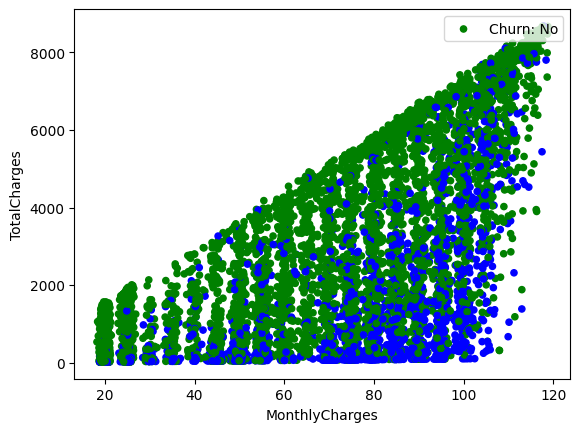

In [12]:
# Set colors based on churn column
colors = ['blue' if churn == 'Yes' else 'green' for churn in ChurnDS_frm_CSV['Churn']]

# Create scatter plot
ax = ChurnDS_frm_CSV.plot.scatter(x='MonthlyCharges', y='TotalCharges', c=colors)

# Add legend
ax.legend(handles=ax.collections, labels=['Churn: No', 'Churn: Yes'], loc='upper right')


Let's analyze the predictor variable, Churn, and its relationship with other significant variables identified in the correlation plot to gain a better understanding of their interactions. This exploration will help us identify any patterns or trends that may exist and can potentially be used to build a predictive model for customer churn.

###### Churn Rate:

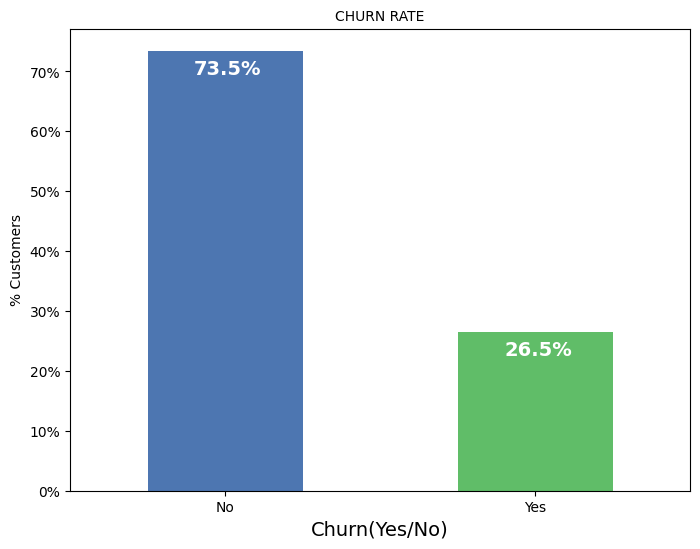

In [13]:
import matplotlib.ticker as mtick # For specifying the axes tick format 
colors = ['#4D76B1', '#60BD68']

ax = (ChurnDS_frm_CSV['Churn'].value_counts()*100.0 /len(ChurnDS_frm_CSV)).plot(kind='bar',
                                                                           stacked = True,
                                                                          rot = 0,
                                                                          color = colors,
                                                                         figsize = (8,6))
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers',size = 10)
ax.set_xlabel('Churn(Yes/No)',size = 14)
ax.set_title('CHURN RATE', size = 10)

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)

for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_x()+.15, i.get_height()-4.0, \
            str(round((i.get_height()/total), 1))+'%',
            #fontsize=12,
            color='white',
           weight = 'bold',
           size = 14)


In our dataset, a significant proportion of customers, specifically 73.5%, do not churn. This suggests a class imbalance in the data, which is not unexpected as we would typically expect a large majority of customers to remain with the company. However, it is crucial to consider this class imbalance when building our predictive models, as it could result in a high number of false negatives. In the forthcoming modeling section, we will explore strategies to address class imbalance and avoid potential inaccuracies in our predictions.

###### Churn vs Tenure: 

<Axes: xlabel='Churn', ylabel='tenure'>

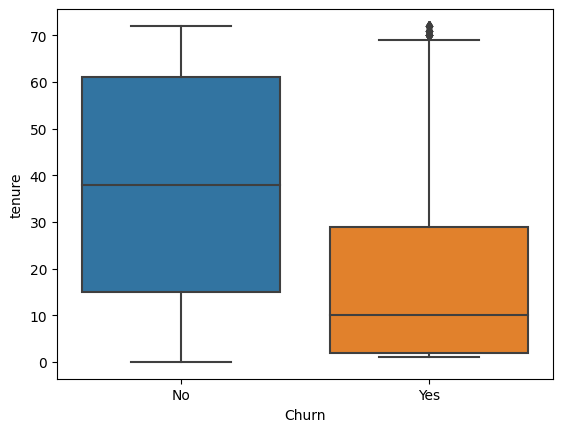

In [14]:
import plotly
from plotly.subplots import make_subplots
import plotly.graph_objects as go
# Create a box plot for MonthlyCharges and Churn
Charges_fig = make_subplots(rows=1, cols=1)
Charges_fig.add_trace(
    go.Box(
        x=  ChurnDS_frm_CSV['Churn'],
        y = ChurnDS_frm_CSV['tenure'],
    ),
    row=1, col=1
)


Charges_fig.update_layout(height=500, width=800, title_text="Monthly Charges by Churn") # Update the layout

sns.boxplot(x = ChurnDS_frm_CSV.Churn, y = ChurnDS_frm_CSV.tenure)

As we can see form the above plot, the customers who do not churn, they tend to stay for a longer tenure with the telecom company.

###### Monthly Charges by Churn

The analysis shows that customers who churned had a higher median monthly charge of 79.65 compared to those who did not churn at 64.425. Therefore, higher monthly charges might be one of the reasons why customers leave.

Furthermore, the interquartile range (IQR) for customers who churned is narrower than those who did not churn, suggesting that the monthly charges for customers who churned are concentrated at higher prices. On the other hand, customers who did not churn have charges spread out across different price points.

Although both groups had a similar maximum monthly charge, the minimum monthly charge for customers who did not churn is slightly lower than that of customers who churned. This could suggest that customers with lower monthly charges are less likely to churn. Higher % of customer churn when the monthly charges are high. 

<Axes: xlabel='Churn', ylabel='MonthlyCharges'>

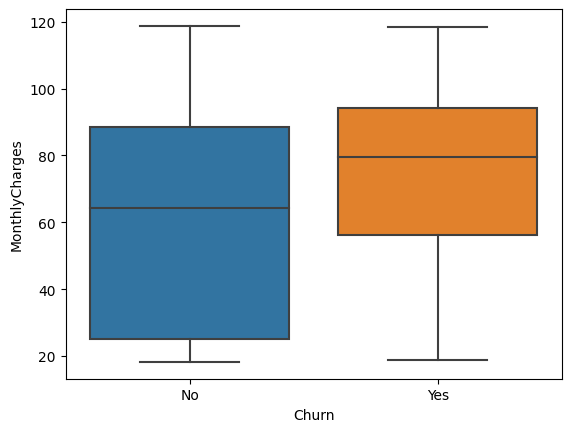

In [15]:
# Create a box plot for MonthlyCharges and Churn
Charges_fig = make_subplots(rows=1, cols=1)
Charges_fig.add_trace(
    go.Box(
        x=  ChurnDS_frm_CSV['Churn'],
        y = ChurnDS_frm_CSV['MonthlyCharges'],
    ),
    row=1, col=1
)


Charges_fig.update_layout(height=500, width=800, title_text="Monthly Charges by Churn") # Update the layout

sns.boxplot(x = ChurnDS_frm_CSV.Churn, y = ChurnDS_frm_CSV.MonthlyCharges)


###### Missing Data:

In [16]:
ProcessedData = ChurnDS_frm_CSV.copy()
ProcessedData.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

Based on the analysis, it was observed that there are 11 missing values for the "Total Charges" feature. Since the missing data is related to total charges, we can impute these values using the mean value of the feature.

In [17]:
#Fill in missing values for 'TotalCharges' with the mean
ProcessedData['TotalCharges'] = ProcessedData['TotalCharges'].fillna(ProcessedData['TotalCharges'].mean())
ProcessedData.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Note that after filling the missing values for the feature Total Charges with the mean values, no missing values were displayed upon running the check again.

In [18]:
ProcessedData.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService   
0  7590-VHVEG  Female              0     Yes         No       1           No  \
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection   
0  No phone service             DSL             No  ...               No  \
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling   
0          No          No              No  Month-to-month              Yes  \
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges  Churn  
0           Electronic check          29.85         29.85     No  
1               Mailed check          56.95       1889.50     No  
2               Mailed check          53.85        108.15    Yes  
3  Bank transfer (automatic)          42.30       1840.75     No  
4           Electronic check          70.70        151.65    Yes  

[5 rows x 21 columns]

In [19]:
#Create a new categorical feature called 'TenureGroup' by bucketing the 'tenure' variable into different groups (e.g., '0-12 months', '13-24 months', '25-36 months', '37-48 months', '47-60 months', > 60 months).
ProcessedData['TenureGroup'] = pd.cut(ProcessedData['tenure'], bins=[-1,12,24,36,48,60,72], labels=['0-1 Year', '1-2 Years', '2-3 Years', '3-4 Years', '4-5 Years', '> 5 Years'])
#Create new binary features indicating whether the customer has specific combinations of services, such as 'PhoneAndInternet'
ProcessedData['PhoneAndInternet'] = (ProcessedData['PhoneService'] == 'Yes') & (ProcessedData['InternetService'] != 'No')
#Create new binary features indicating whether the customer has specific combinations of services, such as 'TechSupportAndInternet'
ProcessedData['TechSupportANDInternet'] = (ProcessedData['TechSupport'] == 'Yes') & (ProcessedData['InternetService'] != 'No')
#Create new binary features indicating whether the customer has specific combinations of services, such as 'SecurityAndInternet'
ProcessedData['SecurityANDInternet'] = (ProcessedData['OnlineSecurity'] == 'Yes') & (ProcessedData['InternetService'] != 'No')
#Create new binary features indicating whether the customer has specific combinations of services, such as 'BackupAndInternet'
ProcessedData['BackupANDInternet'] = (ProcessedData['OnlineBackup'] == 'Yes') & (ProcessedData['InternetService'] != 'No')
#Create new binary features indicating whether the customer has specific combinations of services, such as 'DeviceProtectionAndInternet'
ProcessedData['DeviceProtectionANDInternet'] = (ProcessedData['DeviceProtection'] == 'Yes') & (ProcessedData['InternetService'] != 'No')
#Create new binary features indicating whether the customer has specific combinations of services, such as 'StreamingTVMoviesAndInternet'
ProcessedData['StreamingTVMoviesANDInternet'] = (ProcessedData['StreamingTV'] == 'Yes') & (ProcessedData['StreamingMovies'] == 'Yes') & (ProcessedData['InternetService'] != 'No')
#Create new binary features indicating whether the customer has specific combinations of services, such as 'BackupAndInternet'
ProcessedData['BackupANDInternet'] = (ProcessedData['OnlineBackup'] == 'Yes') & (ProcessedData['InternetService'] != 'No')

In [20]:
ProcessedData.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService   
0  7590-VHVEG  Female              0     Yes         No       1           No  \
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... MonthlyCharges   
0  No phone service             DSL             No  ...          29.85  \
1                No             DSL            Yes  ...          56.95   
2                No             DSL            Yes  ...          53.85   
3  No phone service             DSL            Yes  ...          42.30   
4                No     Fiber optic             No  ...          70.70   

  TotalCharges Churn TenureGroup PhoneAndInternet TechSupportANDInternet   
0        29.85    No    0-1 Year            False                  False  \
1      1889.50    No   2-3 Years             True                  False   
2       108.15   Yes    0-1 Year             True                  False   
3      1840.75    No   3-4 Years            False                   True   
4       151.65   Yes    0-1 Year             True                  False   

  SecurityANDInternet BackupANDInternet  DeviceProtectionANDInternet   
0               False              True                        False  \
1                True             False                         True   
2                True              True                        False   
3                True             False                         True   
4               False             False                        False   

   StreamingTVMoviesANDInternet  
0                         False  
1                         False  
2                         False  
3                         False  
4                         False  

[5 rows x 28 columns]

In [21]:
#Create a new feature called 'TotalServices' that counts the number of services a customer has subscribed to (e.g., phone, internet, online security, online backup, device protection, tech support, streaming TV, and streaming movies).
#ProcessedData['TotalServices'] = ProcessedData[['PhoneService', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']].replace({'Yes': 1, 'No': 0, 'No internet service': 0}).sum(axis=1)
ProcessedData[['PhoneService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']] = ProcessedData[['PhoneService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']].replace({'Yes': 1, 'No': 0, 'No internet service': 0})
ProcessedData[['InternetService']] = ProcessedData[[ 'InternetService']].replace({'DSL': 1, 'Fiber optic': 1, 'No': 0})

#cols = ['PhoneService', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 
        #'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

#for col in cols:
   #print(ProcessedData[col].unique())

ProcessedData['TotalServices'] = pd.to_numeric(ProcessedData['PhoneService']) + pd.to_numeric(ProcessedData['InternetService']) + pd.to_numeric(ProcessedData['OnlineSecurity']) + pd.to_numeric(ProcessedData['OnlineBackup']) + pd.to_numeric(ProcessedData['DeviceProtection']) + pd.to_numeric(ProcessedData['TechSupport']) + pd.to_numeric(ProcessedData['StreamingTV']) + pd.to_numeric(ProcessedData['StreamingMovies'])
ProcessedData.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure  PhoneService   
0  7590-VHVEG  Female              0     Yes         No       1             0  \
1  5575-GNVDE    Male              0      No         No      34             1   
2  3668-QPYBK    Male              0      No         No       2             1   
3  7795-CFOCW    Male              0      No         No      45             0   
4  9237-HQITU  Female              0      No         No       2             1   

      MultipleLines  InternetService  OnlineSecurity  ...  TotalCharges   
0  No phone service                1               0  ...         29.85  \
1                No                1               1  ...       1889.50   
2                No                1               1  ...        108.15   
3  No phone service                1               1  ...       1840.75   
4                No                1               0  ...        151.65   

   Churn  TenureGroup  PhoneAndInternet  TechSupportANDInternet   
0     No     0-1 Year             False                   False  \
1     No    2-3 Years              True                   False   
2    Yes     0-1 Year              True                   False   
3     No    3-4 Years             False                    True   
4    Yes     0-1 Year              True                   False   

  SecurityANDInternet BackupANDInternet DeviceProtectionANDInternet   
0               False              True                       False  \
1                True             False                        True   
2                True              True                       False   
3                True             False                        True   
4               False             False                       False   

   StreamingTVMoviesANDInternet  TotalServices  
0                         False              2  
1                         False              4  
2                         False              4  
3                         False              4  
4                         False              2  

[5 rows x 29 columns]

In [22]:
#Create a feature indicating whether a customer is a senior citizen with tech support or a non-senior citizen with tech support.
ProcessedData['SeniorCitizenWithTechSupport'] = (ProcessedData['SeniorCitizen'] == 1) & (ProcessedData['TechSupport'] == 'Yes')
ProcessedData.isnull().sum()
#ProcessedData.head()

customerID                      0
gender                          0
SeniorCitizen                   0
Partner                         0
Dependents                      0
tenure                          0
PhoneService                    0
MultipleLines                   0
InternetService                 0
OnlineSecurity                  0
OnlineBackup                    0
DeviceProtection                0
TechSupport                     0
StreamingTV                     0
StreamingMovies                 0
Contract                        0
PaperlessBilling                0
PaymentMethod                   0
MonthlyCharges                  0
TotalCharges                    0
Churn                           0
TenureGroup                     0
PhoneAndInternet                0
TechSupportANDInternet          0
SecurityANDInternet             0
BackupANDInternet               0
DeviceProtectionANDInternet     0
StreamingTVMoviesANDInternet    0
TotalServices                   0
SeniorCitizenW

###### Tenure Group
Tenure Group refers to the categorization of customers based on their length of relationship with the company. This is typically done by grouping the 'tenure' variable into different categories, such as '0-12 months', '13-24 months', '25-48 months', '49-60 months', or '> 60 months'.

This approach can reveal patterns related to customer loyalty and the likelihood of churn based on the duration of their association with the company.

In [23]:
import plotly.express as px
TenureGroupChurnHistogram = px.histogram(ProcessedData, x='TenureGroup', color='Churn', barmode='group', title='Tenure Group Churn')


In [24]:
TenureGroupChurnHistogram.show()

###### Observation Tenure Group Churn: 
    Customers with a tenure of 0-1 year appear to have a higher likelihood of churning.

###### Combined Services:
This task involves examining how customers' bundled services(Streaming TV, Movies & Internet) preferences are related to their likelihood of churning. By analyzing patterns in customer behavior, we can identify which services are most important to customers and how they impact churn.

In [25]:
#Create a Historgram for 'StreamingTVMoviesANDInternet' and 'Churn'
StreamingTVMoviesANDInternetChurnHistogram = px.histogram(ProcessedData, x='StreamingTVMoviesANDInternet', color='Churn', barmode='group', title='Streaming TV,Movies & Internet Churn')
StreamingTVMoviesANDInternetChurnHistogram.update_layout(xaxis_title='Streaming TV,Movies & Internet', yaxis_title='Count',height=500, width=800)
StreamingTVMoviesANDInternetChurnHistogram

###### Total Service:
Determine if there is a relationship between the number of services subscribed to by a customer and their likelihood of churning.

In [26]:
#Create a Historgram for 'TotalServices' and 'Churn'
TotalServicesChurnHistogram = px.histogram(ProcessedData, x='TotalServices', color='Churn', barmode='group', title='Total Services Churn')
TotalServicesChurnHistogram.update_layout(xaxis_title='Total Services', yaxis_title='Count',height=500, width=800)
TotalServicesChurnHistogram

   ###### Observation : 
There is a negative correlation between Total Services and churn rate, indicating that customers with more services are less likely to churn.

Moreover, customers who have both Streaming Services and Internet Services tend to have a higher churn rate compared to those who have either one or none of these services.


##### Data Distribution:
    Churn by Total charges

Text(0.5, 1.0, 'Distribution of total charges by churn')

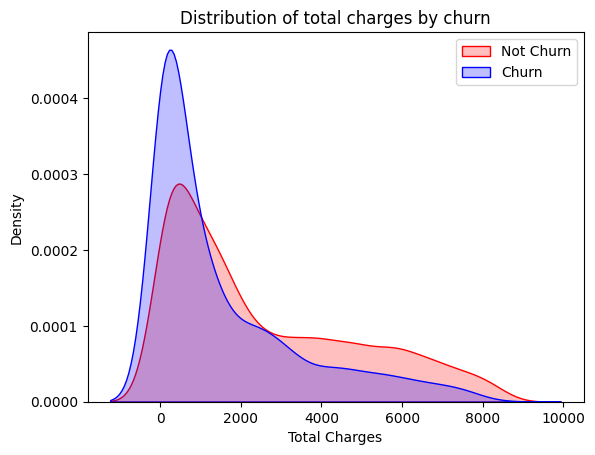

In [27]:
ax = sns.kdeplot(ProcessedData.TotalCharges[(ProcessedData["Churn"] == 'No') ],
                color="Red", fill = True)
ax = sns.kdeplot(ProcessedData.TotalCharges[(ProcessedData["Churn"] == 'Yes') ],
                ax =ax, color="Blue", fill= True)
ax.legend(["Not Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Total Charges')
ax.set_title('Distribution of total charges by churn')

In [28]:
#Remove customer IDs from the data set
df2 = ProcessedData.iloc[:,1:]
#Convertin the predictor variable in a binary numeric variable
df2['Churn'].replace(to_replace='Yes', value=1, inplace=True)
df2['Churn'].replace(to_replace='No',  value=0, inplace=True)

#Let's convert all the categorical variables into dummy variables
df_dummies = pd.get_dummies(df2)
df_dummies.head()

SeniorCitizen  tenure  PhoneService  InternetService  OnlineSecurity   
0              0       1             0                1               0  \
1              0      34             1                1               1   
2              0       2             1                1               1   
3              0      45             0                1               1   
4              0       2             1                1               0   

   OnlineBackup  DeviceProtection  TechSupport  StreamingTV  StreamingMovies   
0             1                 0            0            0                0  \
1             0                 1            0            0                0   
2             1                 0            0            0                0   
3             0                 1            1            0                0   
4             0                 0            0            0                0   

   ...  PaymentMethod_Bank transfer (automatic)   
0  ...                                    False  \
1  ...                                    False   
2  ...                                    False   
3  ...                                     True   
4  ...                                    False   

   PaymentMethod_Credit card (automatic)  PaymentMethod_Electronic check   
0                                  False                            True  \
1                                  False                           False   
2                                  False                           False   
3                                  False                           False   
4                                  False                            True   

   PaymentMethod_Mailed check  TenureGroup_0-1 Year  TenureGroup_1-2 Years   
0                       False                  True                  False  \
1                        True                 False                  False   
2                        True                  True                  False   
3                       False                 False                  False   
4                       False                  True                  False   

   TenureGroup_2-3 Years  TenureGroup_3-4 Years  TenureGroup_4-5 Years   
0                  False                  False                  False  \
1                   True                  False                  False   
2                  False                  False                  False   
3                  False                   True                  False   
4                  False                  False                  False   

   TenureGroup_> 5 Years  
0                  False  
1                  False  
2                  False  
3                  False  
4                  False  

[5 rows x 45 columns]

In [29]:
df_dummies.isnull().sum()

SeniorCitizen                              0
tenure                                     0
PhoneService                               0
InternetService                            0
OnlineSecurity                             0
OnlineBackup                               0
DeviceProtection                           0
TechSupport                                0
StreamingTV                                0
StreamingMovies                            0
MonthlyCharges                             0
TotalCharges                               0
Churn                                      0
PhoneAndInternet                           0
TechSupportANDInternet                     0
SecurityANDInternet                        0
BackupANDInternet                          0
DeviceProtectionANDInternet                0
StreamingTVMoviesANDInternet               0
TotalServices                              0
SeniorCitizenWithTechSupport               0
gender_Female                              0
gender_Mal

<Axes: >

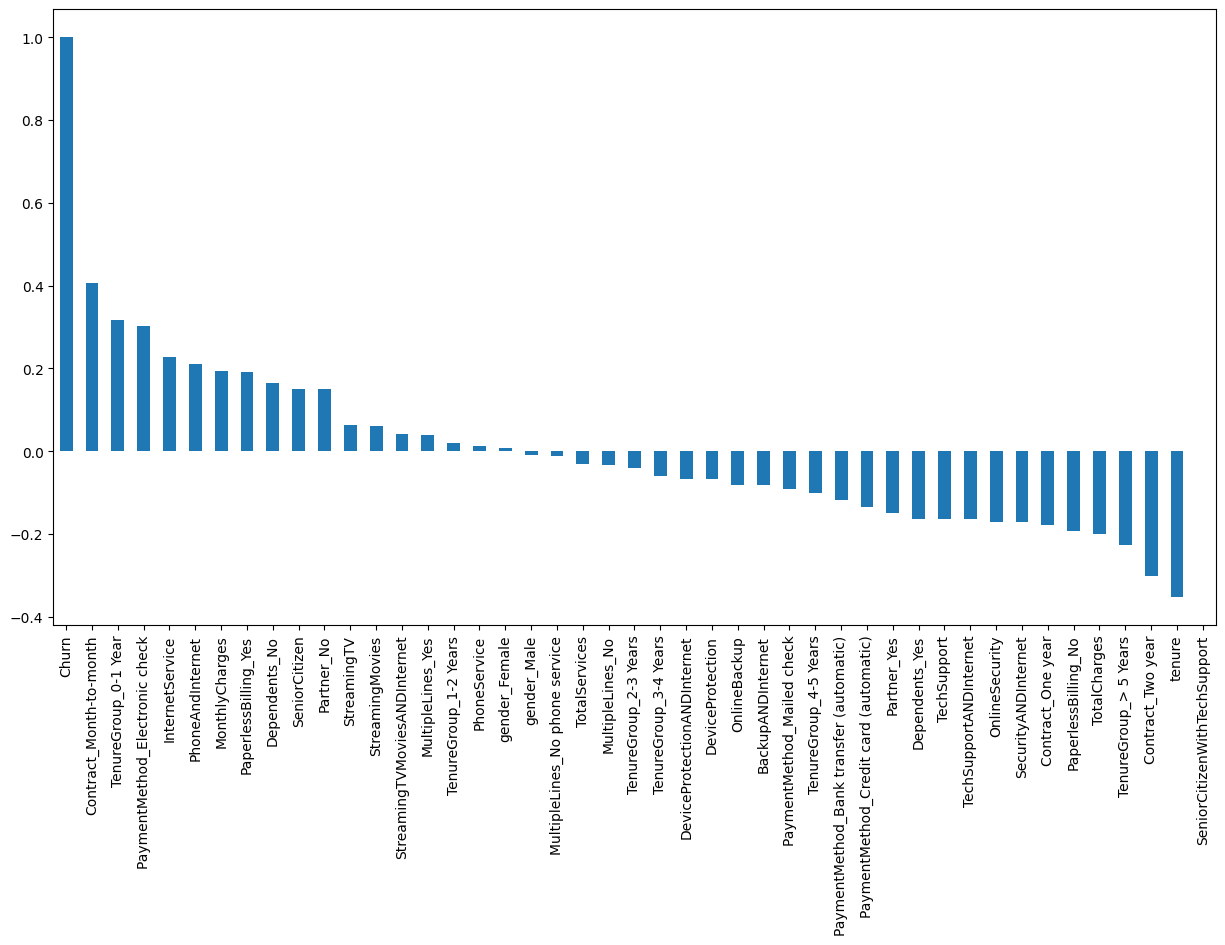

In [30]:
#Get Correlation of "Churn" with other variables:
plt.figure(figsize=(15,8))
df_dummies.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

###### Positive correlations: 
The analysis suggests that churn is positively correlated with month-to-month contracts,Electronic payment and the absence of online security and tech support, while negatively correlated with longer tenure and two-year contracts.
###### Negative correlations: 
Notably, services like online security, streaming TV, online backup, tech support, etc. that don't require an internet connection appear to have a negative correlation with churn.

Based on the insights gained from the dataset analysis, we will identify the key features and use them to build a predictive model for diagnosing customer churn.


#### Feature Selection:

###### Tree Based Feature Selection:

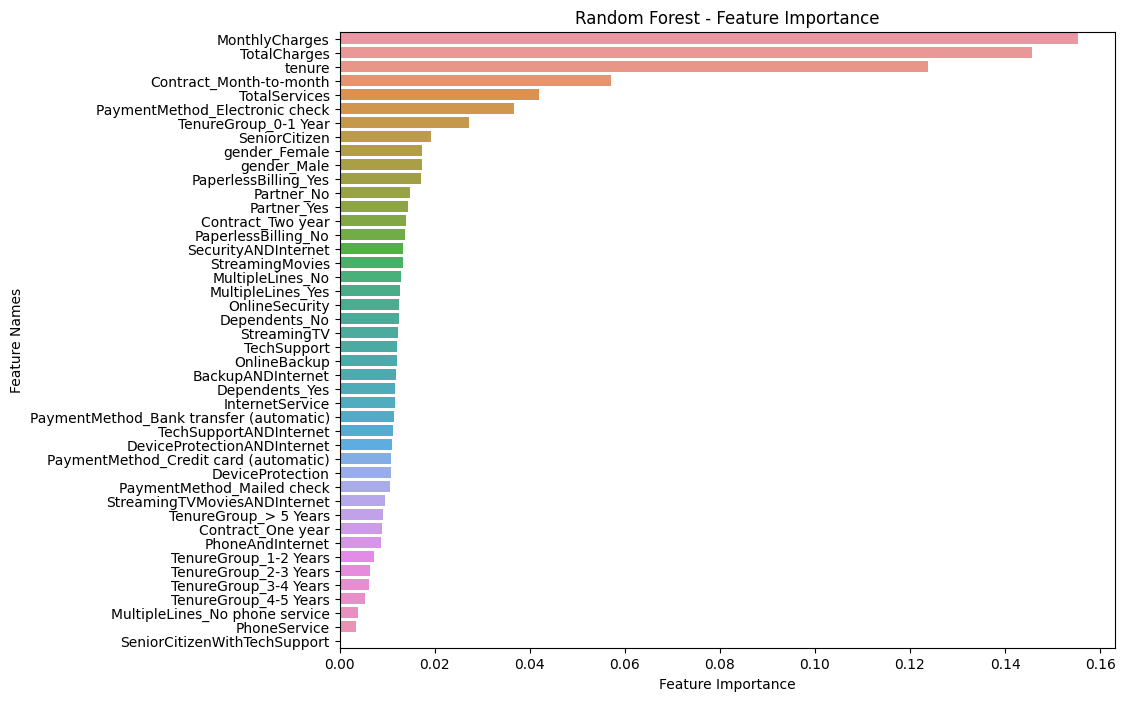

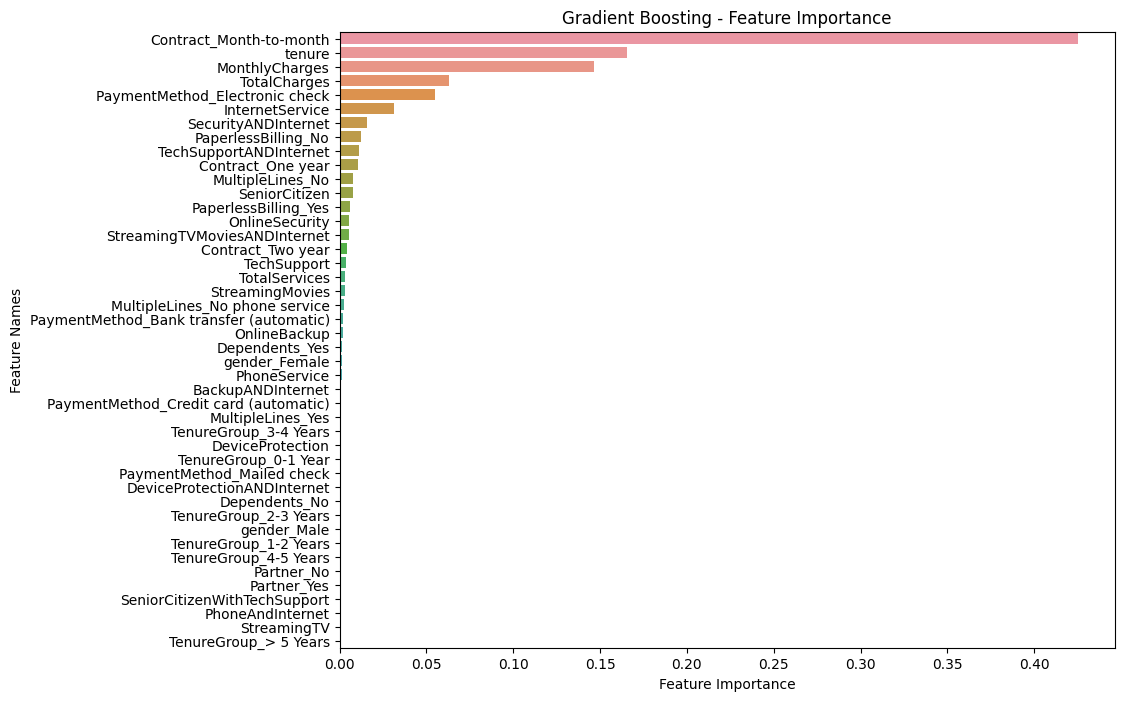

In [31]:
# Tree-based feature selection
import numpy as np
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

train_data = df_dummies.copy()

Tree_X = train_data.drop('Churn', axis=1)
Tree_y = train_data['Churn']

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(Tree_X, Tree_y)

gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(Tree_X, Tree_y)

def plot_feature_importance(importance, names, model_type):
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)

    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

    plt.figure(figsize=(10,8))
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
    plt.title(model_type + ' - Feature Importance')
    plt.xlabel('Feature Importance')
    plt.ylabel('Feature Names')

plot_feature_importance(rf_model.feature_importances_, Tree_X.columns, 'Random Forest')
plot_feature_importance(gb_model.feature_importances_, Tree_X.columns, 'Gradient Boosting')

In [32]:
rf_importance = rf_model.feature_importances_
gb_importance = gb_model.feature_importances_

feature_importance_df = pd.DataFrame({"Feature": Tree_X.columns, "RandomForest": rf_importance, "GradientBoosting": gb_importance})

feature_importance_df["AverageImportance"] = (feature_importance_df["RandomForest"] + feature_importance_df["GradientBoosting"]) / 2

feature_importance_df = feature_importance_df.sort_values(by="AverageImportance", ascending=False)

feature_importance_df

Feature  RandomForest  GradientBoosting   
29                  Contract_Month-to-month      0.057060          0.424963  \
10                           MonthlyCharges      0.155265          0.146754   
1                                    tenure      0.123780          0.165511   
11                             TotalCharges      0.145692          0.063121   
36           PaymentMethod_Electronic check      0.036805          0.054853   
18                            TotalServices      0.042008          0.003154   
3                           InternetService      0.011596          0.031482   
14                      SecurityANDInternet      0.013411          0.015979   
38                     TenureGroup_0-1 Year      0.027261          0.000437   
0                             SeniorCitizen      0.019175          0.007906   
32                      PaperlessBilling_No      0.013823          0.012644   
33                     PaperlessBilling_Yes      0.017145          0.005999   
13                   TechSupportANDInternet      0.011260          0.011290   
26                         MultipleLines_No      0.012898          0.008002   
30                        Contract_One year      0.008924          0.010630   
20                            gender_Female      0.017362          0.001367   
31                        Contract_Two year      0.013952          0.004466   
4                            OnlineSecurity      0.012436          0.005348   
21                              gender_Male      0.017280          0.000094   
9                           StreamingMovies      0.013251          0.003135   
7                               TechSupport      0.012154          0.003944   
22                               Partner_No      0.014923          0.000000   
17             StreamingTVMoviesANDInternet      0.009600          0.005275   
23                              Partner_Yes      0.014322          0.000000   
5                              OnlineBackup      0.012105          0.001845   
34  PaymentMethod_Bank transfer (automatic)      0.011477          0.002067   
25                           Dependents_Yes      0.011681          0.001692   
28                        MultipleLines_Yes      0.012681          0.000633   
15                        BackupANDInternet      0.011840          0.000888   
24                            Dependents_No      0.012416          0.000242   
8                               StreamingTV      0.012363          0.000000   
35    PaymentMethod_Credit card (automatic)      0.010921          0.000794   
16              DeviceProtectionANDInternet      0.011105          0.000275   
6                          DeviceProtection      0.010727          0.000465   
37               PaymentMethod_Mailed check      0.010710          0.000349   
43                    TenureGroup_> 5 Years      0.009153          0.000000   
12                         PhoneAndInternet      0.008670          0.000000   
39                    TenureGroup_1-2 Years      0.007257          0.000000   
41                    TenureGroup_3-4 Years      0.006278          0.000470   
40                    TenureGroup_2-3 Years      0.006386          0.000206   
27           MultipleLines_No phone service      0.003915          0.002514   
42                    TenureGroup_4-5 Years      0.005398          0.000000   
2                              PhoneService      0.003534          0.001205   
19             SeniorCitizenWithTechSupport      0.000000          0.000000   

    AverageImportance  
29           0.241011  
10           0.151009  
1            0.144645  
11           0.104406  
36           0.045829  
18           0.022581  
3            0.021539  
14           0.014695  
38           0.013849  
0            0.013540  
32           0.013234  
33           0.011572  
13           0.011275  
26           0.010450  
30           0.009777  
20           0.009365  
31           0.009209  
4            0.008892  
21           0.008687  


In [33]:
#Features selected to construct our Predictive Model
FilteredDataByFeatures = train_data[["Contract_Month-to-month","MonthlyCharges","tenure","TotalCharges","PaymentMethod_Electronic check","TotalServices","InternetService","OnlineSecurity","Contract_Two year","OnlineBackup","MultipleLines_Yes","Dependents_Yes","TenureGroup_> 5 Years","MultipleLines_No phone service","StreamingTVMoviesANDInternet","PaperlessBilling_Yes","SecurityANDInternet","DeviceProtectionANDInternet"]].copy()

FilteredDataByFeatures.isnull().sum()
FilteredDataByFeatures.shape

(7043, 18)

18 Features selected for our modeling based the data obtained from Random Foresh and Gradient feature selection.

In [34]:
from sklearn.model_selection import train_test_split

Training_X = df_dummies.drop('Churn', axis=1)
Training_y = df_dummies['Churn']

X_train, X_test, y_train, y_test = train_test_split(Training_X, Training_y, test_size=0.2, random_state=42)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [35]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron


models = [
    ('Logistic Regression', LogisticRegression()),
    ('Support Vector Machines', SVC()),
    ('Random Forest', RandomForestClassifier(n_estimators=100)),
    ('Decision Tree', DecisionTreeClassifier()),   
    ('KNN', KNeighborsClassifier()), 
    ('Perceptron', Perceptron())
]

Logistic Regression: 0.803 (0.009)
Support Vector Machines: 0.789 (0.007)
Random Forest: 0.787 (0.011)
Decision Tree: 0.727 (0.011)
KNN: 0.758 (0.007)
Perceptron: 0.725 (0.030)


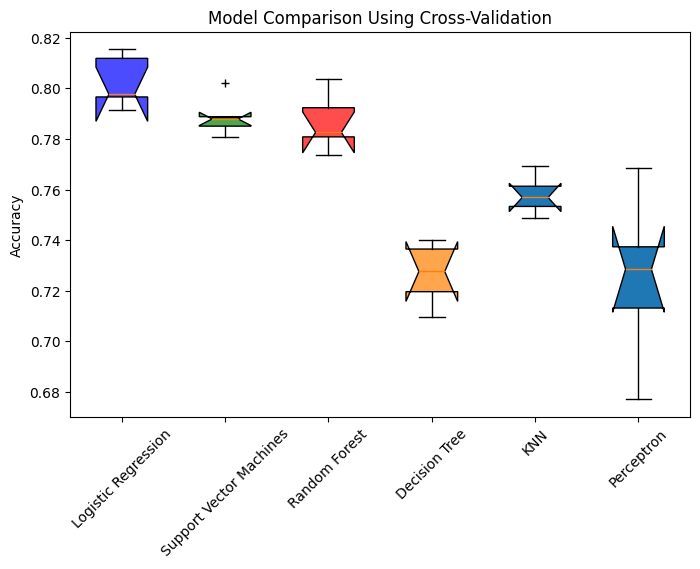

In [37]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import cross_val_score

# Define colors for each boxplot
colors = [(0, 0, 1, 0.7), (0, 0.5, 0, 0.7), (1, 0, 0, 0.7), (1, 0.5, 0, 0.7)]
names = ['Logistic Regression','Support Vector Machines','Random Forest','Decision Tree','KNN','Perceptron']
# Create empty list to store the boxplots
boxplots = []

# Loop through each model and calculate cross-validation scores
for name, model in models:
    cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='accuracy')
    boxplots.append(cv_scores)
    print(f"{name}: {cv_scores.mean():.3f} ({cv_scores.std():.3f})")

# Create figure with subplots
fig, ax = plt.subplots(figsize=(8, 5))

# Create boxplots with different colors
bp = ax.boxplot(boxplots, patch_artist=True, notch=True, sym='k+')

# Set x-axis labels
ax.set_xticklabels(names, rotation=45)

# Set y-axis label and title
ax.set_ylabel('Accuracy')
ax.set_title('Model Comparison Using Cross-Validation')

# Set colors for each boxplot
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)

plt.show()


###### Observations:
Based on our EDA(Exploratory Data Analysis), we have identified some variables that have a negative relation to our predicted variable (Churn), while others have a positive relation. A negative relation implies that the likelihood of churn decreases with that variable, while a positive relation implies the opposite.

Some of the interesting features we have observed are:

Customers with a 2-month contract are less likely to churn compared to those with longer contracts.
The tenure of a customer has the most negative relation with Churn as predicted by logistic regressions, indicating that customers who have been with the company for a longer period of time are less likely to churn.
Having internet service reduces the probability of churn.
On the other hand, total charges, monthly contracts and seniority can lead to higher churn rates.

Based on the results, the Logistic Regression model has the highest accuracy of 0.803 with a standard deviation of 0.009. It outperforms the other models, including Support Vector Machines, Random Forest, Decision Tree, KNN, and Perceptron. Therefore, Logistic Regression could be the best model for this problem. However, further analysis and evaluation are recommended to confirm the robustness and effectiveness of the model.

###### Evaluate Accuracy measure for Logistic Regression:


In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

L_model = LogisticRegression(solver='liblinear')


L_model.fit(X_train, y_train)

y_pred = L_model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

print("Classification report:")
print(classification_report(y_test, y_pred))

print("Confusion matrix:")
print(confusion_matrix(y_test, y_pred))

### Conclusion: 


    Based on the classification report, the model has an overall accuracy of 0.81, which means it correctly predicted the target variable 81% of the time. The precision for class 0 is 0.85, indicating that when the model predicted a customer will not churn, it was correct 85% of the time. The recall for class 0 is 0.90, indicating that out of all the actual customers who did not churn, the model correctly identified 90% of them.

    On the other hand, for class 1 (customers who churned), the precision is 0.67, indicating that when the model predicted a customer will churn, it was correct 67% of the time. The recall for class 1 is 0.56, indicating that out of all the actual customers who churned, the model correctly identified only 56% of them.

    Therefore, while the model has a good overall accuracy, it may not be as effective in identifying customers who are likely to churn. Further analysis may be needed to improve the model's performance in identifying churned customers.